In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

This dataset contains a list of video games with sales greater than 100,000 copies.

Fields include

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

In [40]:
df = pd.read_csv('/Users/starburned/data_analytics_projects/data/vgsales.csv')

In [41]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [11]:
df.groupby('Genre')['Name'].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Name, dtype: int64

In [14]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

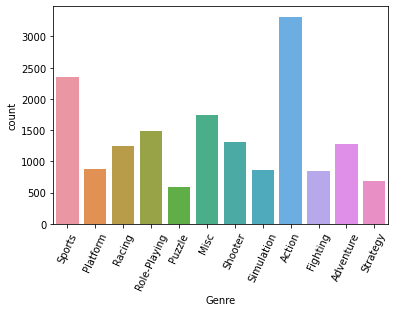

In [24]:
sns.countplot(x='Genre', data=df)
plt.xticks(rotation=65);

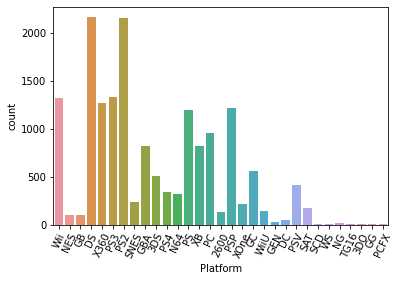

In [25]:
sns.countplot(x='Platform', data=df)
plt.xticks(rotation=65);

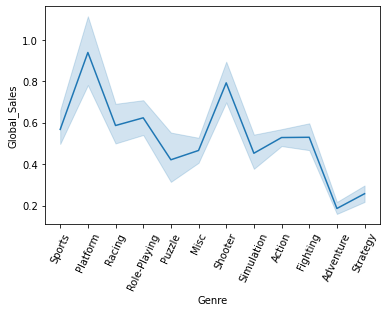

In [28]:
sns.lineplot(x='Genre', y ='Global_Sales', data=df)
plt.xticks(rotation=65);

In [30]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [31]:
df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

Name
Wii Sports                              82.74
Grand Theft Auto V                      55.92
Super Mario Bros.                       45.31
Tetris                                  35.84
Mario Kart Wii                          35.82
                                        ...  
Codename: Panzers Phase Two              0.01
Tengai Makyo: Dai Yon no Mokushiroku     0.01
Jewel Quest II                           0.01
Tenjin Ranman: Happy GO Lucky!!          0.01
Dark Parables: The Exiled Prince         0.01
Name: Global_Sales, Length: 11493, dtype: float64

## Visualizations using Plotly express

In [45]:
fig = px.scatter(df, x="Platform", y="Global_Sales", color = "Genre", size="Global_Sales")
fig.show()

In [47]:
fig = px.bar(df, x="Platform", y="Global_Sales", color = "Genre")
fig.show()

In [48]:
fig = px.pie(df, values='Global_Sales', names='Genre')
fig.show()

In [51]:
len(df)

16598

In [50]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [52]:
df = df.dropna(subset=['Publisher'])

In [53]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            249
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [57]:
fig = px.sunburst(df, path=['Publisher', 'Genre'], values='Global_Sales')
fig.show()

In [56]:
fig = px.sunburst(df, path=['Platform', 'Publisher', 'Genre'], values='Global_Sales', width=1000, height=1000)
fig.show()